In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
npz_file = np.load('MNIST/mnist_arr.npz')
img_arr = npz_file['images']

In [26]:
img_arr.shape

(60000, 784)

In [13]:
class KMeans:
    def __init__(self, 
                 k, # number of centers
                 X):
        self.k = k
        self.X = X # data objects
        self.N, self.d = self.X.shape
        
    def initialization(self, random_seed = 123):
        np.random.seed(seed = random_seed)
        self.centers = np.zeros((self.k, self.d))
        
        X = self.X
        k = self.k
        centers = self.centers
        """
        TODO:
        initialize your first k centers as in self.centers
        TODO:
        If you decide to do the Bonus Question, then implement the k-means++ here
        """
        #==========================K-means ++ =====================================
        r = np.random.randint(0, len(X) - 1)
        centers[0] = X[r]
        
        for i in range(1,k):
            #calculate distances
            D2 = np.array([min([np.linalg.norm(c-x) ** 2 for c in centers]) for x in X])
            
            probs = D2/D2.sum()
            cum = probs.cumsum()
            
            r = np.random.random()

            for j, p in enumerate(cum):
                if r < p:
                    index = j
                    break
                    
            centers[i] = X[index]
        # ======================== k-means=========================================
        #np.random.shuffle(X)
        #centers = X[:k,:]
        
        return centers
    
    def cluster_assign_and_update(self, old_centers):
        """
        TODO:
        assign your data objects to clusters and update the k centers self.centers
        """
        #add a new parameter called old_centers for the updata purpose
        #old_centers = self.initialization()
        center_num = self.k
        dataset = self.X
        
        #=================================assign================================
        # try dictionary like {0: [data points]; 1: [data points]...}
        clusters = {c: [] for c in range(center_num)}
        
        #loop through data and check centers which one is the closest
        # for each data in MNIST
        for data_i in dataset:
            min_dist = float("inf") #aasign to inf first
            for j in range(center_num):
                c_j = old_centers[j]
                distance = np.linalg.norm(data_i - c_j)
                if distance < min_dist:
                    assign_center = j
                    min_dist = distance
        
            clusters[assign_center].append(data_i)
        #print('clusters: ',clusters)
        
        #==================================update===============================   
        #find the mean of data points for one cluster
        new_centers = []
        
        for point_set in clusters.values():
            counter = 0
            if(len(point_set)) > 0 : 
                sum_point = point_set[0].copy()
                for a in point_set[1:]:
                    sum_point = np.add(a,sum_point)
                mean_point = np.asarray(sum_point) * 1.0/len(point_set)
                new_centers.append(mean_point)
            else:
                new_centers.append(np.asarray(old_centers[counter]))
            
            counter += 1
        
        return new_centers
    
    def iteration(self, tol, max_iters=1000):
        """
        TODO:
        Perform kmeans iteration until convergence (use tol and max_iters as paramters to control your convergence)
        """
        #============================the first iteration====================================
        #tol = tolerance
        
        old_centers = self.initialization()
        new_centers = self.cluster_assign_and_update(old_centers)
        print('1st: ', max(map(lambda a, b: np.linalg.norm(a-b),old_centers, new_centers)))
        
        iteration = 1
        
        #============================afterwards...==========================================
        #while 
        while True:
            differences = max(map(lambda a, b: np.linalg.norm(a-b),old_centers, new_centers))
            print('iteration:', iteration, differences)
            iteration += 1
            
            if differences < tol or iteration > max_iters:
                break
            
            #center update
            old_centers = new_centers
            new_centers = self.cluster_assign_and_update(old_centers)
    
        return new_centers

## Write code below to execute kmeans on MNIST img_arr with k=2,5,10,30

In [17]:
"""
Examples:
k = 10
kmeans_obj = KMeans(k,img_arr)
kmeans_obj.initialization()
centers = kmeans_obj.centers
"""
k_list = [2,5,10,30]
center_list = []
for k in k_list:
    print('==================now K is :', k)
    kmeans_obj = KMeans(k,img_arr)
    center_list.append(kmeans_obj.iteration(tol = 0.1))

==================now K is : 2
1st:  1768.9181918040379
iteration: 1 1768.9181918040379
iteration: 2 150.1957908482931
iteration: 3 61.625546445548174
iteration: 4 40.37139333477302
iteration: 5 31.897018915495703
iteration: 6 26.73652351051441
iteration: 7 22.707507724879484
iteration: 8 19.909747937283996
iteration: 9 16.976964734491975
iteration: 10 13.880000559396015
iteration: 11 10.69945982953863
iteration: 12 8.786830689231632
iteration: 13 6.383036887017961
iteration: 14 5.4981082067541935
iteration: 15 3.8020980334445595
iteration: 16 2.563190219586549
iteration: 17 2.3028846487704024
iteration: 18 2.03597894087513
iteration: 19 1.5463445965087526
iteration: 20 1.4310788918133144
iteration: 21 1.17131352644681
iteration: 22 0.905824365940012
iteration: 23 0.5857353692399347
iteration: 24 0.5675540477428326
iteration: 25 0.2755307737474854
iteration: 26 0.21232708571933068
iteration: 27 0.1603680851187463
iteration: 28 0.08363326864172543
==================now K is : 5
1st:  17

iteration: 114 3.0575030467392748
iteration: 115 4.958780105978545
iteration: 116 5.038107949290023
iteration: 117 3.8612931441314933
iteration: 118 3.0594648826935886
iteration: 119 3.0119576034481637
iteration: 120 2.481202081865384
iteration: 121 2.8241120194836262
iteration: 122 5.537744326290474
iteration: 123 8.055340104587545
iteration: 124 4.791101957685472
iteration: 125 6.397543122376748
iteration: 126 7.588252175863397
iteration: 127 4.78145229956885
iteration: 128 5.492665346653953
iteration: 129 6.098884967284098
iteration: 130 6.8094256437163425
iteration: 131 6.357550302007718
iteration: 132 4.435812932986633
iteration: 133 5.509109393248164
iteration: 134 4.988446389815825
iteration: 135 5.633141544146082
iteration: 136 6.044339688885013
iteration: 137 9.949560197375584
iteration: 138 9.275927567171095
iteration: 139 5.4455674021349605
iteration: 140 5.568728065877951
iteration: 141 6.102119284913188
iteration: 142 7.378162073516211
iteration: 143 6.794466782421162
iter

## Implement code to visualize your cluster centers with k=2,5,10,30

In [8]:
"""
TODO 
write code to respectively plot your cluster centers with k = 2,5,10,30
"""
def display_digit(digit):
    """ 
    graphically displays a 784x1 vector, representing a digit
    """
    image = digit
    plt.figure()
    fig = plt.imshow(image.reshape(28,28))
    fig.set_cmap('gray_r')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)

K=2


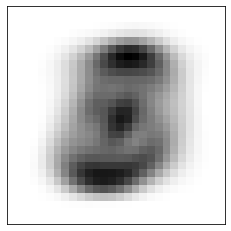

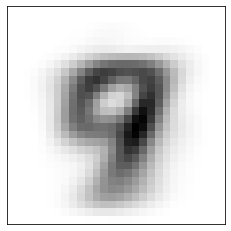

In [21]:
print('K=2')
for digit in center_list[0]:
    display_digit(digit)

K=5


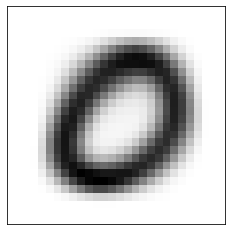

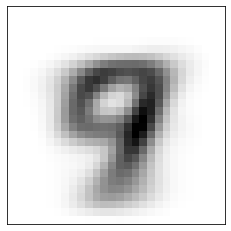

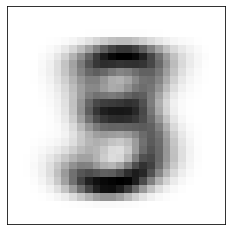

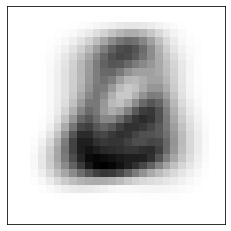

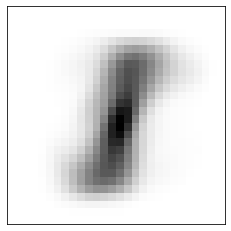

In [22]:
print('K=5')
for digit in center_list[1]:
    display_digit(digit)

K=10


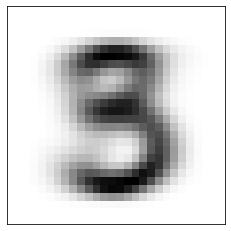

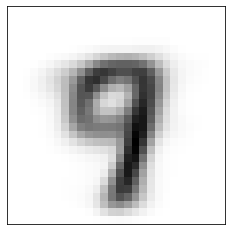

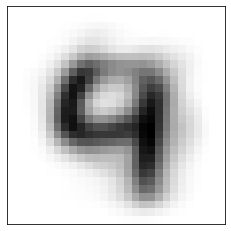

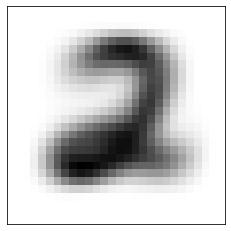

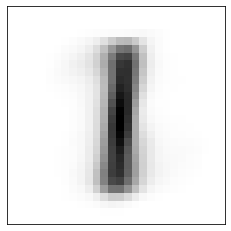

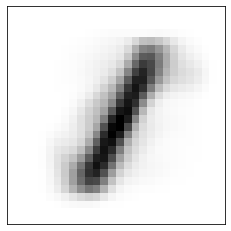

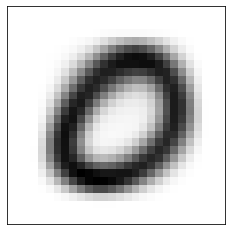

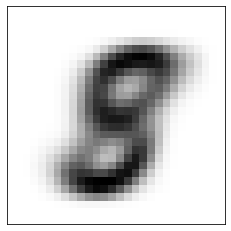

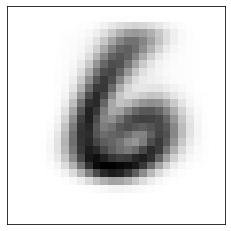

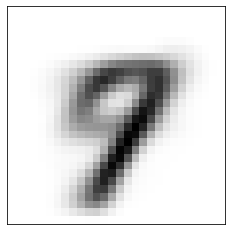

In [23]:
print('K=10')
for digit in center_list[2]:
    display_digit(digit)

K=30


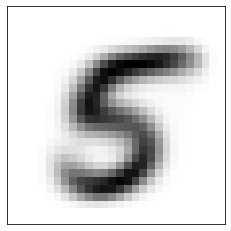

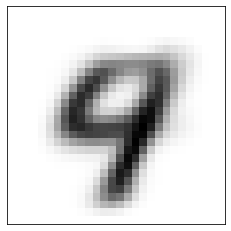

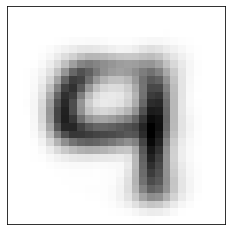

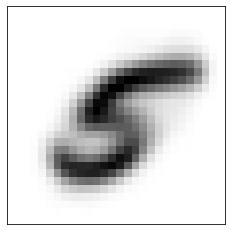

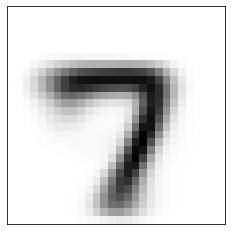

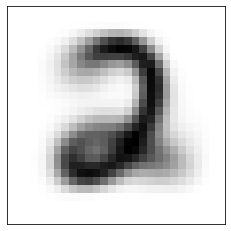

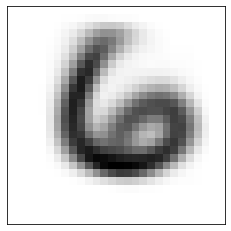

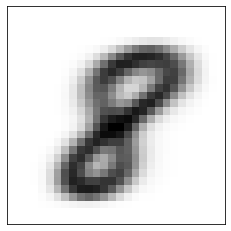

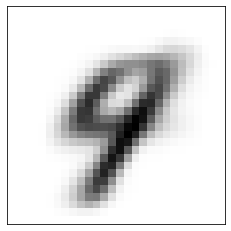

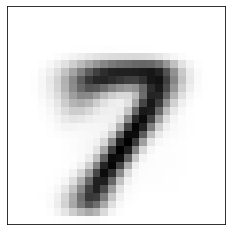

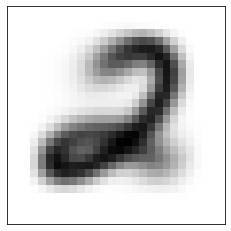

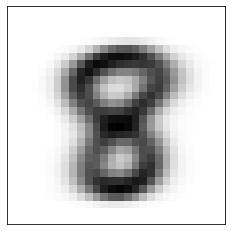

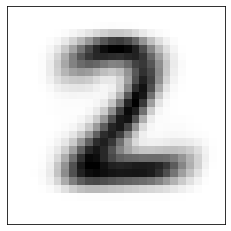

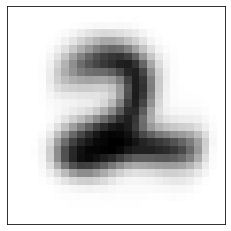

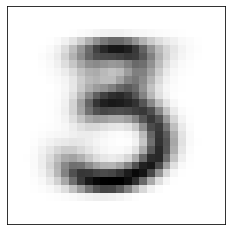

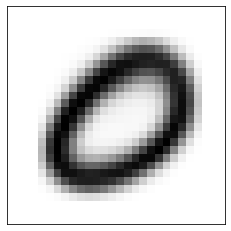

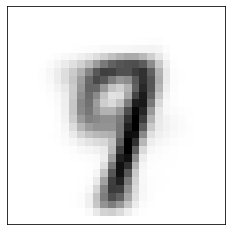

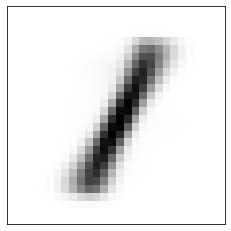

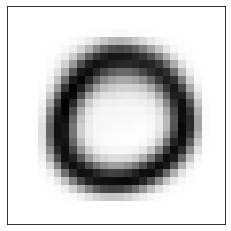

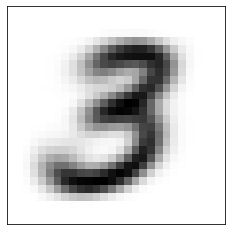

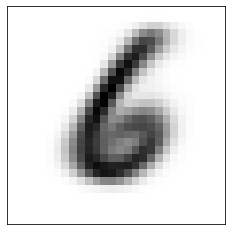

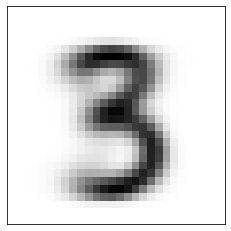

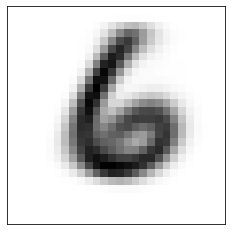

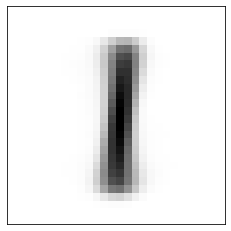

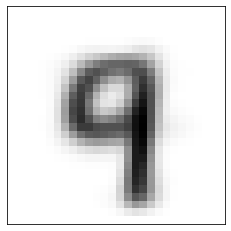

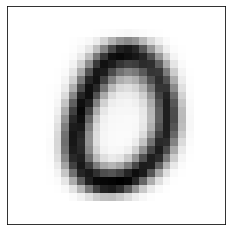

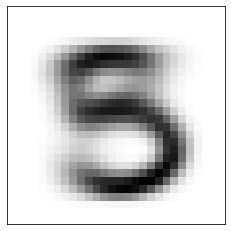

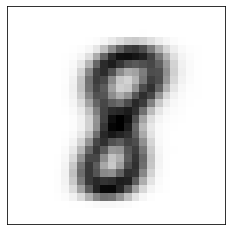

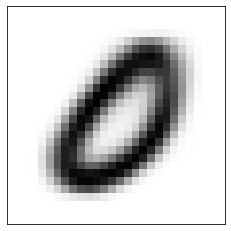

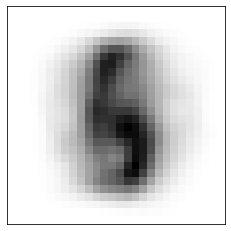

In [24]:
print('K=30')
for digit in center_list[3]:
    display_digit(digit)